In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# Image("Coefficients_magnitude.png",width=800)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.max_rows = 1000
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#warning hadle
warnings.filterwarnings("ignore")

In [4]:
df =  pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Missing Values

In [8]:
mis_val = df.isnull().sum()
mis_val_percentage = 100*mis_val/len(df)
missing_val = pd.concat([mis_val,mis_val_percentage],axis =1)
missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_val = missing_val.sort_values('Missing Values',ascending = False)
missing_val.head(10)

,Missing Values,% of Total Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


## Dropping variables which has high missing values 

In [9]:
# variable containing the columns that we want to remove
miss_data_col = ['Alley','PoolQC', 'Fence', 'MiscFeature']
df = df.drop(miss_data_col,axis=1)
df.shape

(1460, 77)

## Dropping Id variable

In [10]:
# df = df.drop('Id',axis=1)
# df.shape

In [11]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


# Target Feature: SalePrice

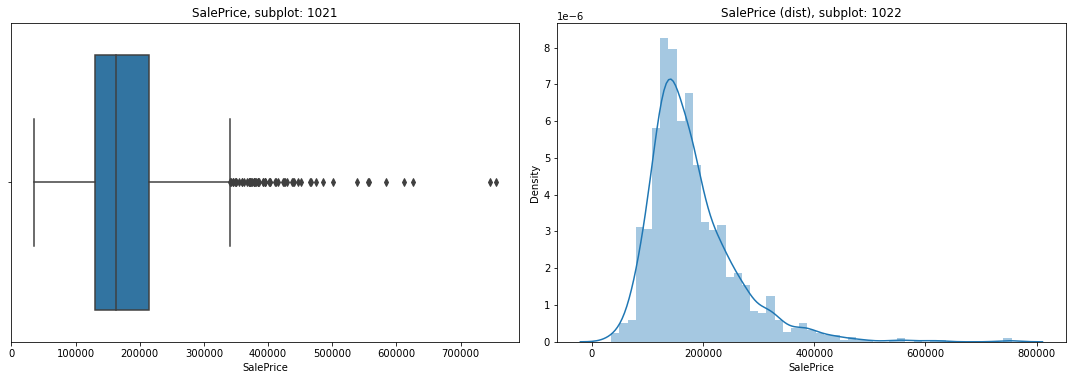

In [12]:
target_col = ['SalePrice']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1
    
   

plt.tight_layout()
plt.show();

Two observations here - Our target variable contains outliers in the data also it is right skewed - not normally distributed. We will take log transformation on our target variable

In [13]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [14]:
# Q3=df['SalePrice'].quantile(q=.75)
# Q1=df['SalePrice'].quantile(q=.25)
# IQR=Q3-Q1
# lower_limit=Q1-(1.5*IQR)
# upper_limit=Q3+(1.5*IQR)
# print('q3={},q1={},iqr={},lower_limit={},upper_limit={}'.format(Q3,Q1,IQR,lower_limit,upper_limit))
# df=df[((df['SalePrice']>=lower_limit) & (df['SalePrice']<=upper_limit))]

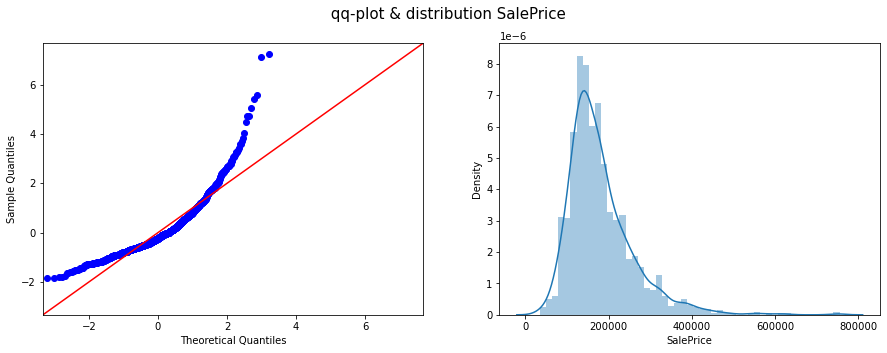

In [15]:
import statsmodels.api as sm
from scipy import stats

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(df['SalePrice'], kde = True, hist=True, ax = ax[1])
plt.show()

In [16]:
df['SalePrice_log'] = np.log(df['SalePrice'])

In [17]:
saleprice = df[['SalePrice']].copy()
df = df.drop('SalePrice',axis=1) # removing the orignal variable

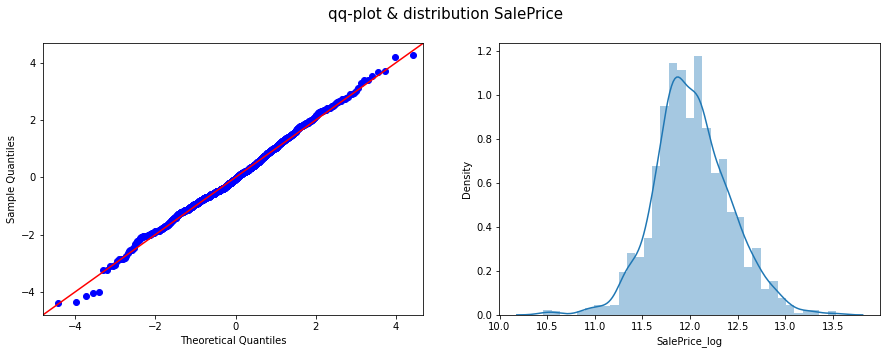

In [18]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df['SalePrice_log'] , stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(df['SalePrice_log'] , kde = True, hist=True, ax = ax[1])
plt.show()

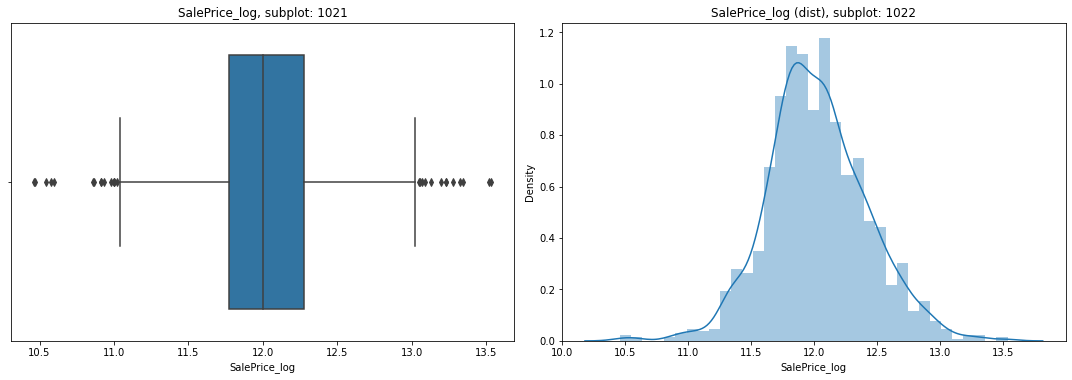

In [19]:
target_col = ['SalePrice_log']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df[i])
    c = c + 1

plt.tight_layout()
plt.show();

In [20]:
df['is_pool']=np.where(df['PoolArea']==0,0,1)

# Outliers Detection

In [21]:
num_col = df.select_dtypes(include=np.number).columns.tolist()
num_col

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice_log',
 'is_pool']

In [22]:
num_data = df[num_col]
num_data.shape

(1460, 39)

In [23]:
num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log,is_pool
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,0


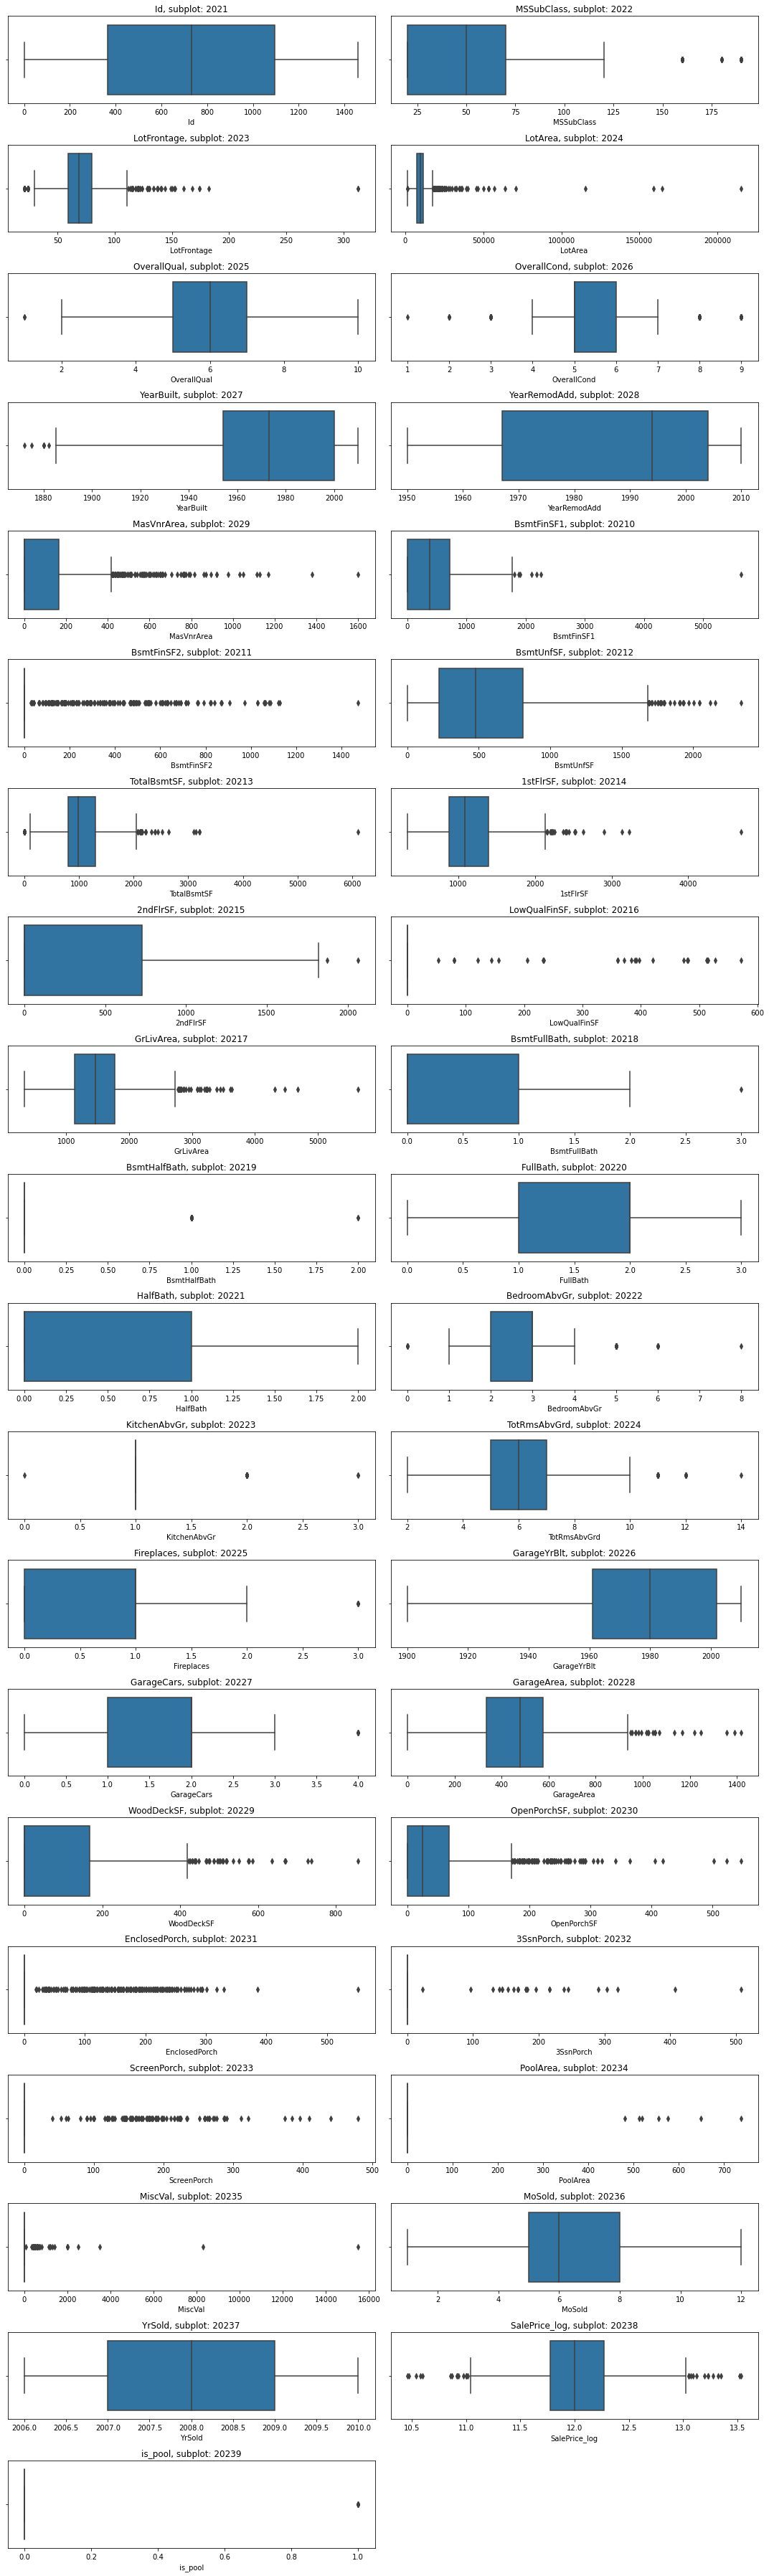

In [24]:
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

# Treat Missing Values - Presence of Outliers in the data

## Numerical columns

In [25]:
num_data.isnull().sum().sort_values(ascending=False)[:10]

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
Id                 0
EnclosedPorch      0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
dtype: int64

#### Check the target variable carefully

In [26]:
# Importing the SimpleImputer class 
from sklearn.impute import SimpleImputer

In [27]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')

In [28]:
num_data['LotFrontage'] = imputer.fit_transform(num_data[['LotFrontage']].copy()).ravel()
num_data['GarageYrBlt'] = imputer.fit_transform(num_data[['GarageYrBlt']].copy()).ravel()
num_data['MasVnrArea'] = imputer.fit_transform(num_data[['MasVnrArea']].copy()).ravel()

In [29]:
num_data.isnull().sum().sort_values(ascending=False)[:10]

Id               0
OpenPorchSF      0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
EnclosedPorch    0
dtype: int64

In [30]:
print("Shape of the data",num_data.shape)

Shape of the data (1460, 39)


<AxesSubplot:>

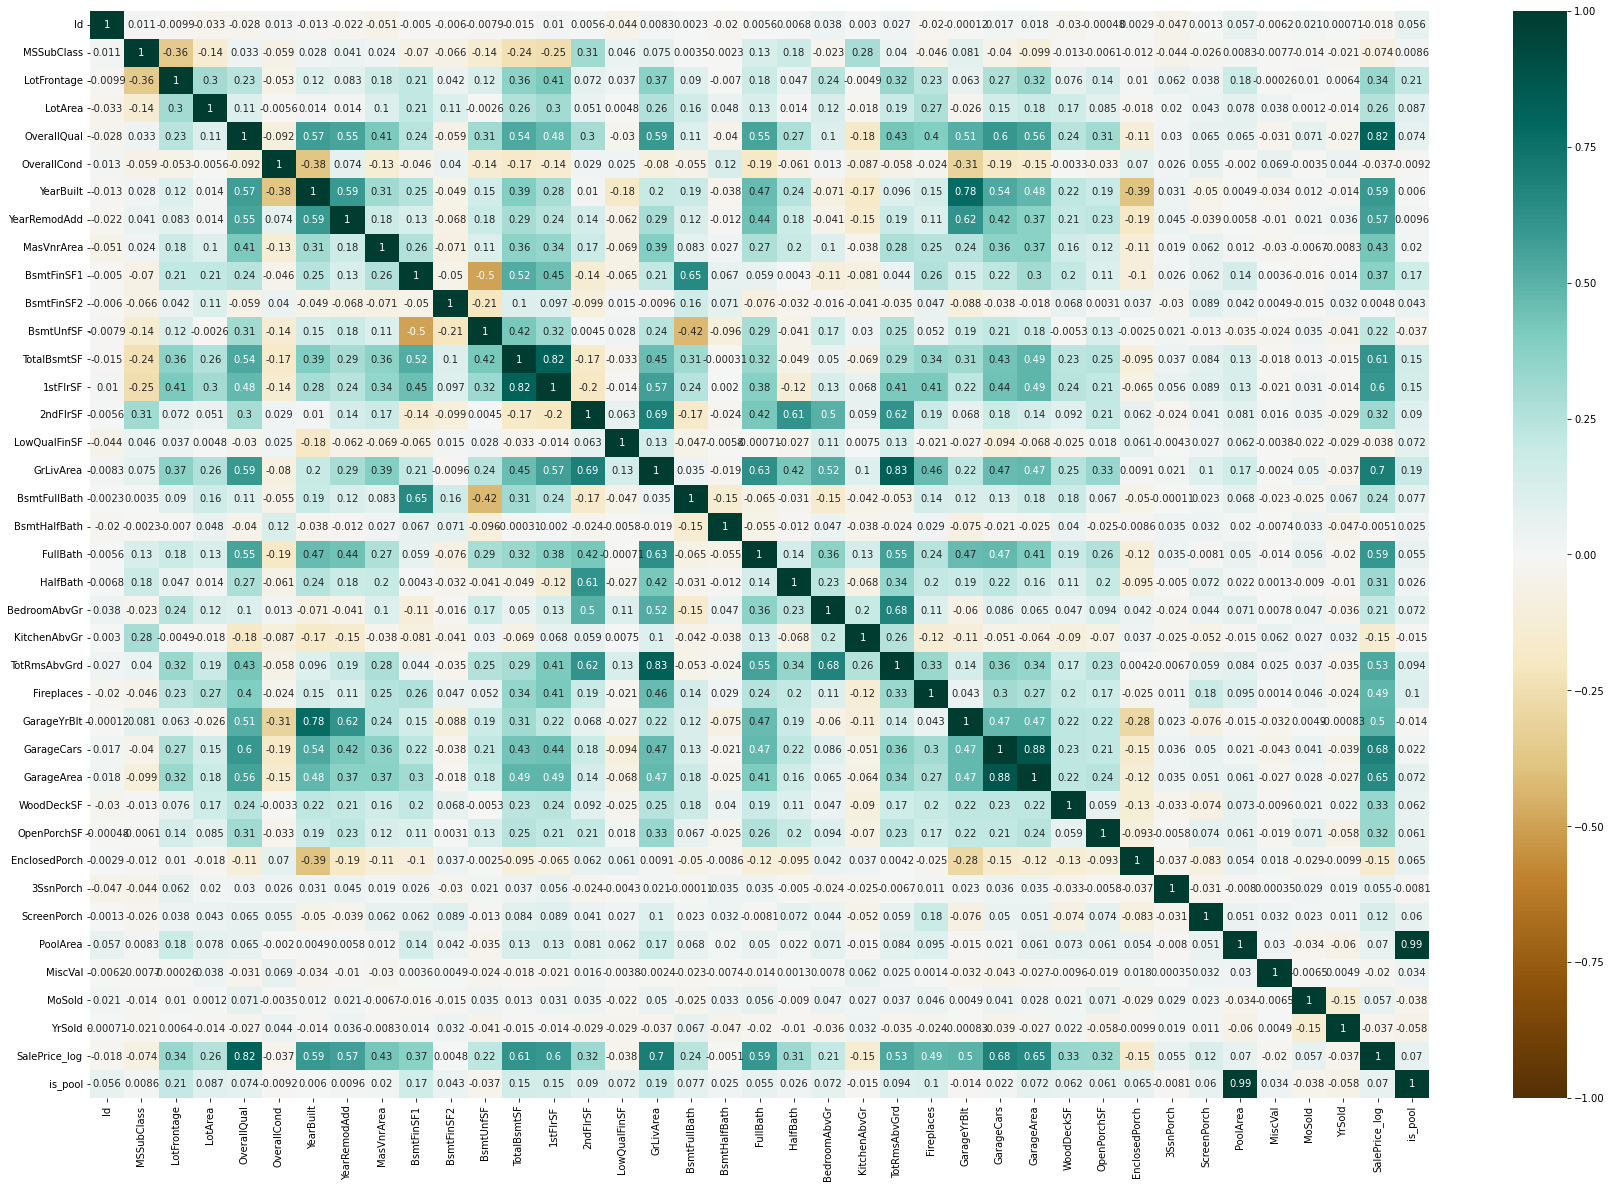

In [31]:
plt.figure(figsize=(30, 20))

sns.heatmap(num_data.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

In [32]:
df_corr=num_data.corr()
df_corr_stacked=df_corr.stack().reset_index()
# df_corr_stacked[(abs(df_corr_stacked[0])>.50) & (abs(df_corr_stacked[0])<1.0)].to_csv('corr.csv')

In [33]:
num_data['TotalCarpetArea']=num_data['TotalBsmtSF']+num_data['1stFlrSF']+num_data['2ndFlrSF']

In [34]:
num_data['GrAreaPerRmsAbvGrd']=num_data['GrLivArea']/num_data['TotRmsAbvGrd']

In [35]:
num_data['GarageAreaPerCar']=num_data['GarageArea']/num_data['GarageCars']

In [36]:
col_to_drop=['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','TotRmsAbvGrd','GarageArea','GarageCars','GarageYrBlt'\
             ,'YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','MoSold','YrSold','is_pool','PoolArea']
num_data.drop(columns=col_to_drop,axis=1,inplace=True)

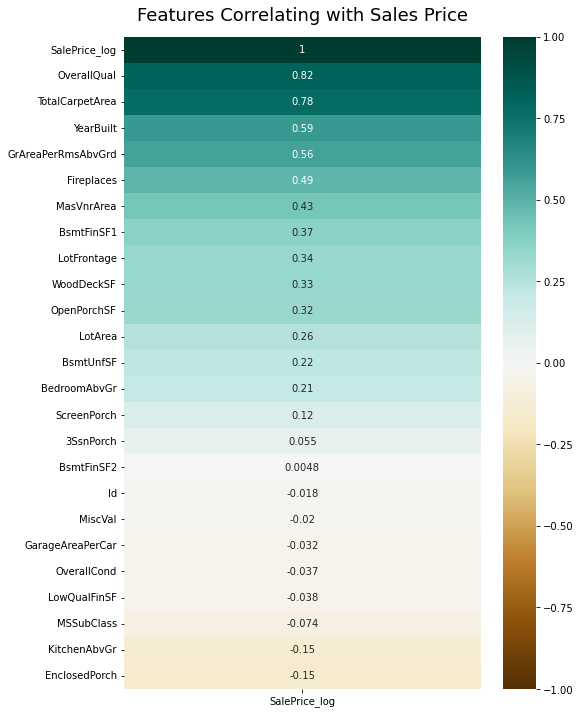

In [37]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(num_data.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

~10 features are coming important with having higher correlation with target variable

## Skewness in the numerical features

In [38]:
from scipy.stats import skew 
skew_in_vars = num_data.iloc[:,:-1].apply(lambda x: skew(x))
skew_in_vars.sort_values(ascending=False)

MiscVal               24.451640
LotArea               12.195142
3SsnPorch             10.293752
LowQualFinSF           9.002080
KitchenAbvGr           4.483784
BsmtFinSF2             4.250888
ScreenPorch            4.117977
EnclosedPorch          3.086696
MasVnrArea             2.674865
LotFrontage            2.406671
OpenPorchSF            2.361912
TotalCarpetArea        1.774874
BsmtFinSF1             1.683771
WoodDeckSF             1.539792
MSSubClass             1.406210
BsmtUnfSF              0.919323
GrAreaPerRmsAbvGrd     0.816425
OverallCond            0.692355
Fireplaces             0.648898
OverallQual            0.216721
BedroomAbvGr           0.211572
SalePrice_log          0.121210
Id                     0.000000
YearBuilt             -0.612831
dtype: float64

#### Identifyin the variable which has high skewness more than 0.5

In [39]:
high_skew = skew_in_vars[skew_in_vars > 0.5]
skew_index = high_skew.index
skew_index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'KitchenAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'TotalCarpetArea', 'GrAreaPerRmsAbvGrd'],
      dtype='object')

In [40]:
len(skew_index)

19

## Transforming the X- Feature (Log tranformation)

In [41]:
for i in skew_index:
    num_data[i] = np.log1p(num_data[i])

In [42]:
num_data.apply(lambda x: skew(x)).sort_values(ascending=False)

3SsnPorch             7.727026
LowQualFinSF          7.452650
MiscVal               5.165390
KitchenAbvGr          3.865437
ScreenPorch           3.147171
BsmtFinSF2            2.521100
EnclosedPorch         2.110104
MasVnrArea            0.503014
MSSubClass            0.248741
OverallQual           0.216721
BedroomAbvGr          0.211572
Fireplaces            0.181896
WoodDeckSF            0.153379
GrAreaPerRmsAbvGrd    0.142969
SalePrice_log         0.121210
Id                    0.000000
OpenPorchSF          -0.023373
LotArea              -0.137263
OverallCond          -0.253754
TotalCarpetArea      -0.348213
YearBuilt            -0.612831
BsmtFinSF1           -0.617774
LotFrontage          -0.869112
BsmtUnfSF            -2.184257
GarageAreaPerCar           NaN
dtype: float64

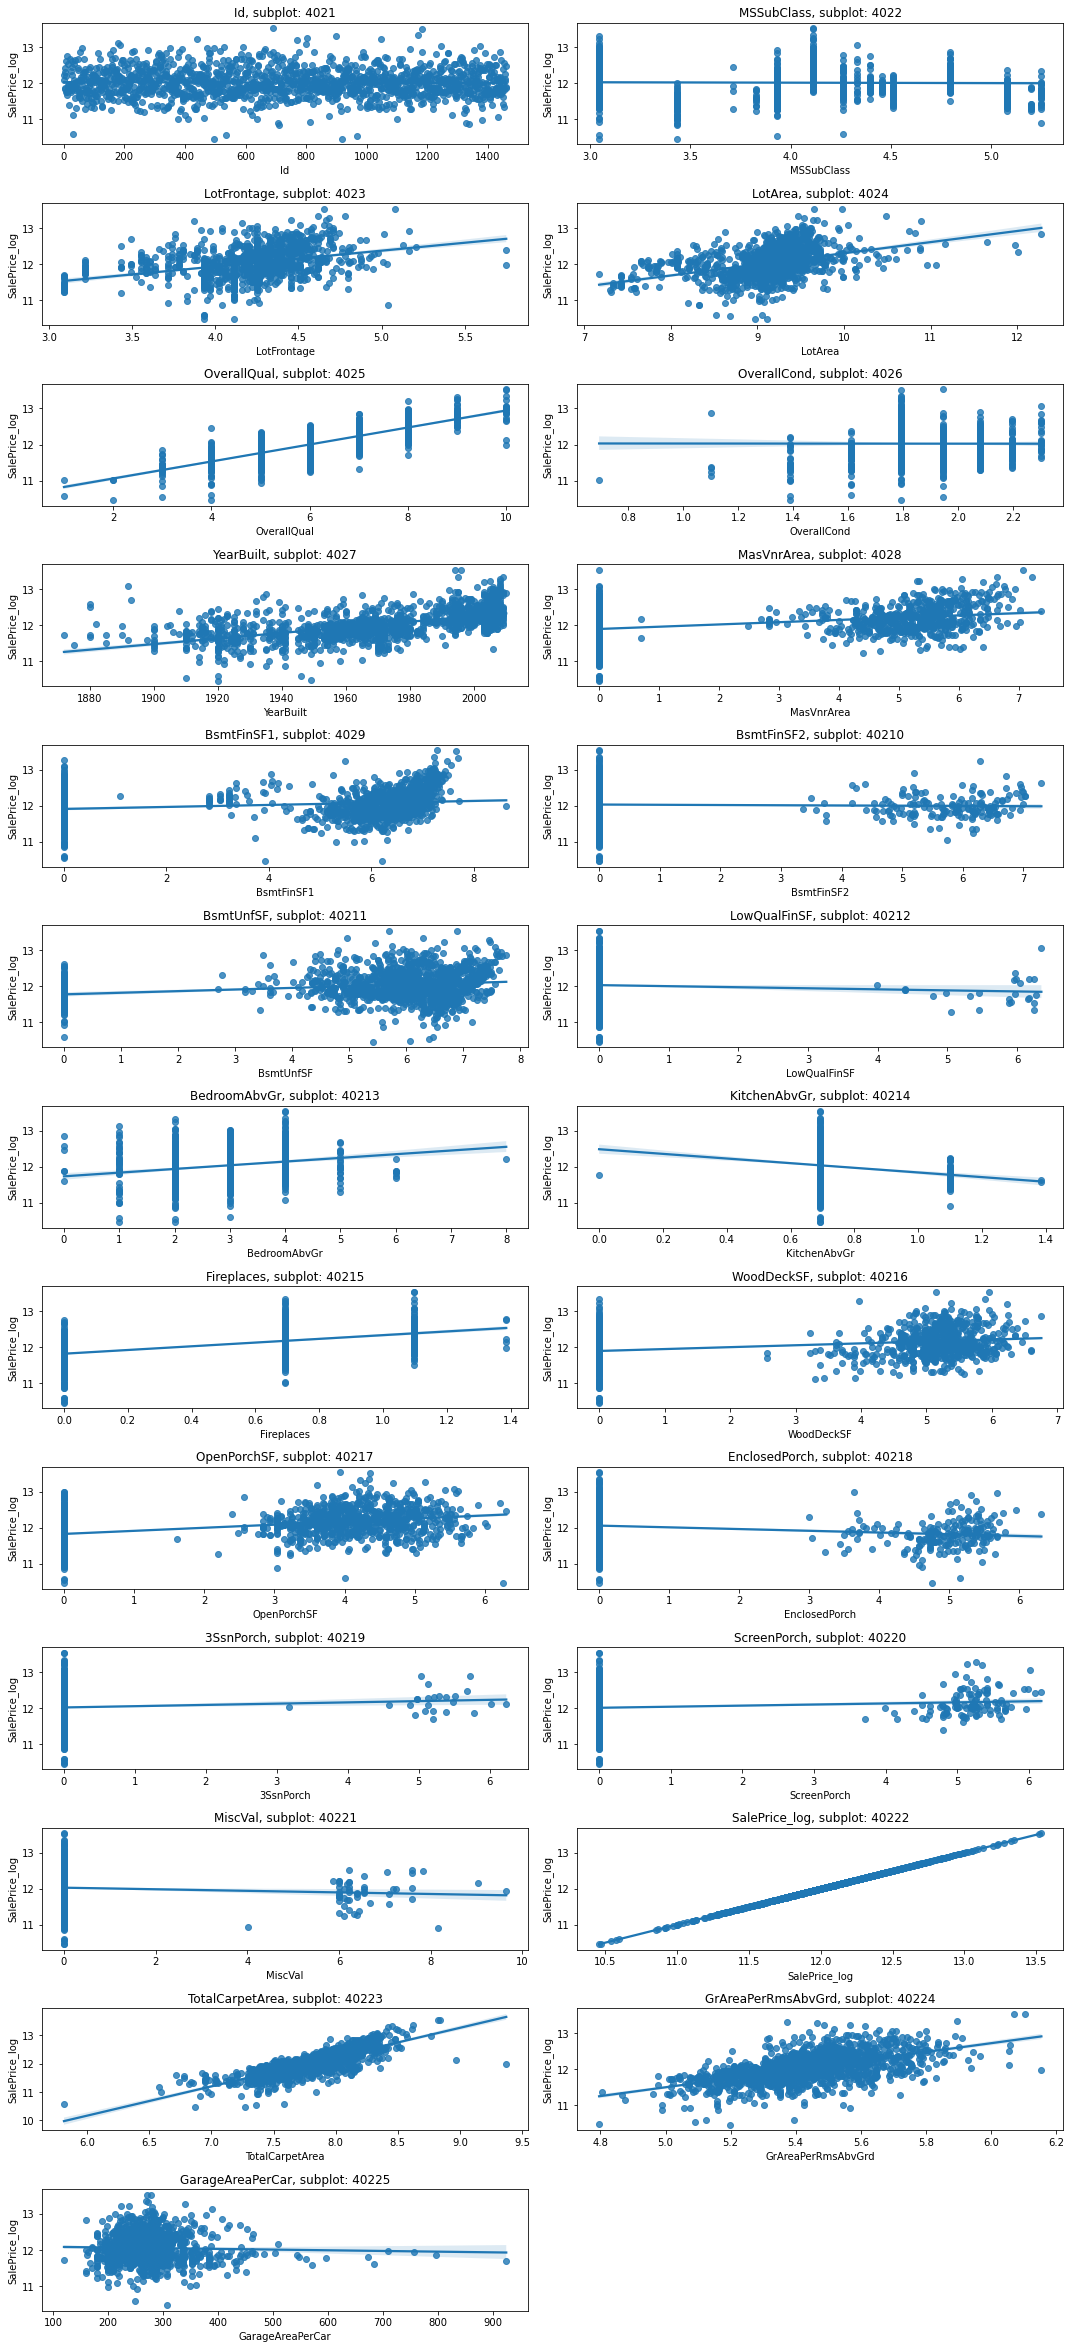

In [43]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in num_data.columns:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.regplot(num_data[i], num_data['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Drop the columns that are not strongly correlated to the target variable numerical features that are less than a threshold corr value

In [44]:
num_corr_data = num_data.corr()
top_corr_num_col = num_corr_data.index[abs(num_corr_data['SalePrice_log'])>0.2]
top_corr_num_col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SalePrice_log', 'TotalCarpetArea',
       'GrAreaPerRmsAbvGrd'],
      dtype='object')

In [45]:
num_data_f = num_data[top_corr_num_col]
num_data_f.shape

(1460, 15)

<AxesSubplot:>

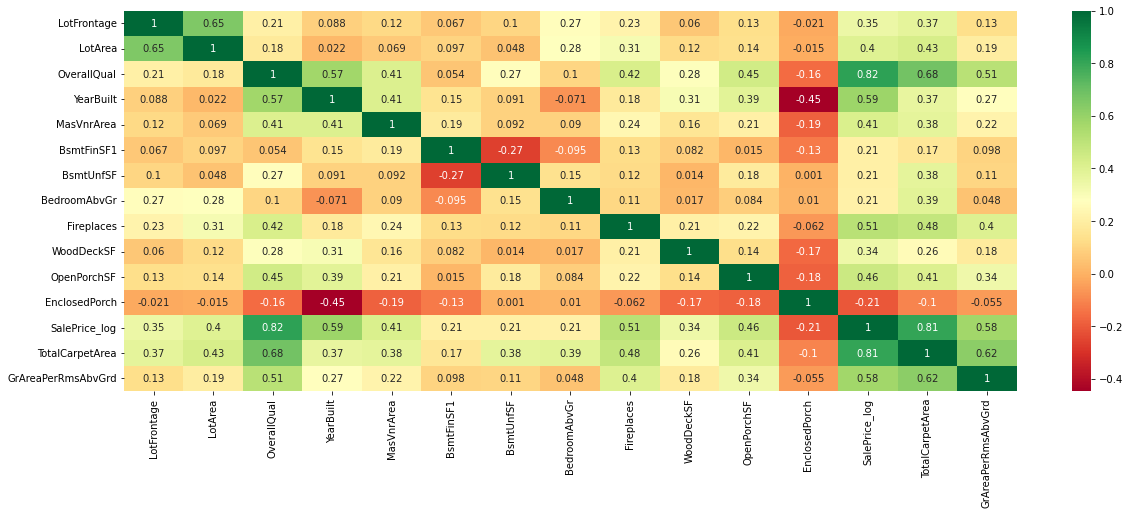

In [46]:
plt.figure(figsize=(20,7))
sns.heatmap(num_data_f.corr(),annot=True,cmap="RdYlGn")

# Categorical Variables

In [47]:
cat_col = df.select_dtypes(include=object).columns.tolist()
cat_col[:5]

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']

In [48]:
cat_col.extend(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','is_pool'])

In [49]:
cat_df = df[cat_col]
cat_df.shape

(1460, 44)

In [50]:
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,is_pool
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,0,1,2,0,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,1,0,1,0,0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0


In [51]:
cat_df.isnull().sum().sort_values(ascending=False)[:20]

FireplaceQu     690
GarageType       81
GarageCond       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrType        8
Electrical        1
Heating           0
HeatingQC         0
CentralAir        0
SaleType          0
PavedDrive        0
Functional        0
HalfBath          0
FullBath          0
dtype: int64

In [52]:
cat_df['FireplaceQu'] = cat_df['FireplaceQu'].fillna('NA')
cat_df['GarageCond'] = cat_df['GarageCond'].fillna('NA')
cat_df['GarageQual'] = cat_df['GarageQual'].fillna('NA')
cat_df['GarageFinish'] = cat_df['GarageFinish'].fillna('NA')
cat_df['GarageType'] = cat_df['GarageType'].fillna('NA')

In [53]:
cat_df['BsmtFinType2'] = cat_df['BsmtFinType2'].fillna('NA')
cat_df['BsmtExposure'] = cat_df['BsmtExposure'].fillna('NA')
cat_df['BsmtCond']     = cat_df['BsmtCond'].fillna('NA')
cat_df['BsmtQual']     = cat_df['BsmtQual'].fillna('NA')
cat_df['BsmtFinType1'] = cat_df['BsmtFinType1'].fillna('NA')

In [54]:
cat_df['MasVnrType'] = cat_df['MasVnrType'].fillna('None')
cat_df['Electrical'] = cat_df['Electrical'].fillna(method='ffill')

In [55]:
cat_df.isnull().sum().sort_values(ascending=False)[:5]

MSZoning        0
Street          0
BsmtFinType2    0
Heating         0
HeatingQC       0
dtype: int64

In [56]:
cat_df.shape

(1460, 44)

In [57]:
print(cat_df.shape)
cat_df.head()

(1460, 44)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,is_pool
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,0,1,2,0,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,1,0,1,0,0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0


In [58]:
# Adding Target variable
cat_df = pd.concat([cat_df,num_data_f[['SalePrice_log']]],axis=1)
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,is_pool,SalePrice_log
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0,12.247694
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,0,1,2,0,0,12.109011
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0,12.317167
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,1,0,1,0,0,11.849398
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,1,0,2,1,0,12.429216


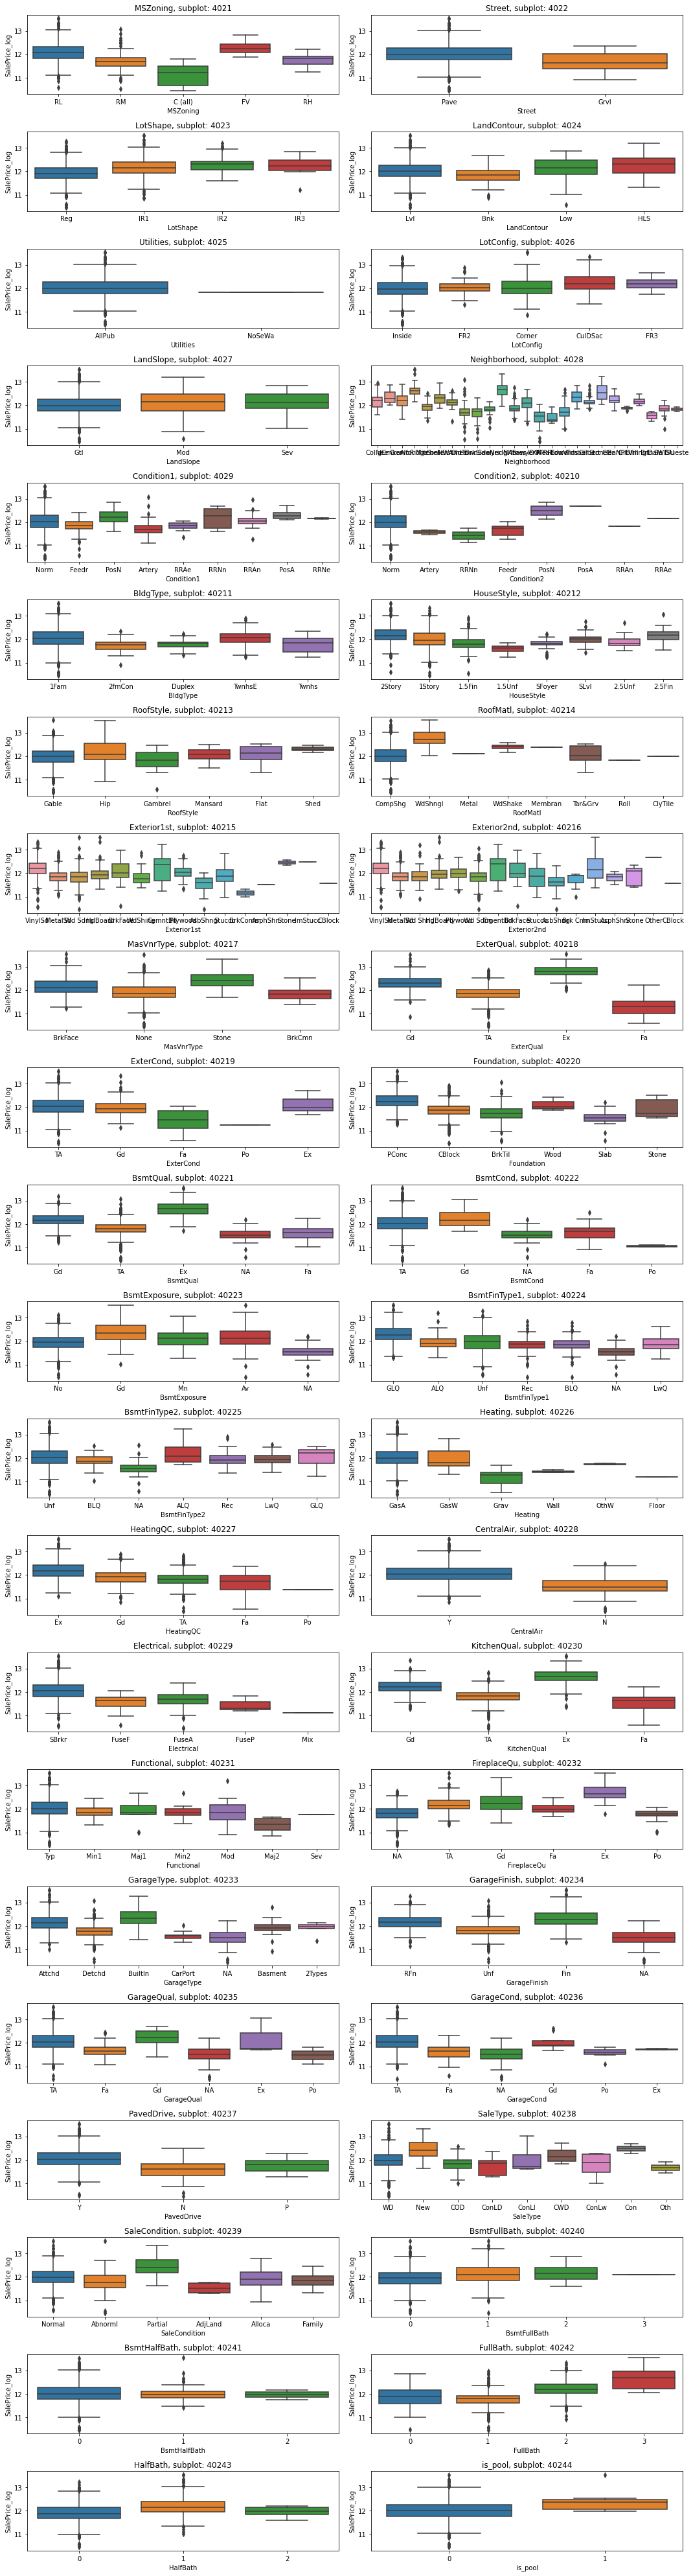

In [59]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in cat_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(cat_df[i], cat_df['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

The categorical variables are corelated to the target variable Saleprice if the mean and the distrubition are different / varying for each features of a particular variable

In [60]:
top_corr_cat_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition','BsmtFullBath','BsmtHalfBath','FullBath',
'HalfBath','is_pool']

## Q- What else we can do to identify the correlation between Categorical and Y variable

In [61]:
cat_df_f = cat_df[top_corr_cat_col]
cat_df_f.shape

(1460, 44)

# One hot Encoding - Encoding Categorical Features

In [62]:
#convert categorical variable into dummy
cat_df_f = pd.get_dummies(cat_df_f,drop_first=True)

In [63]:
cat_df_f.shape

(1460, 215)

In [64]:
cat_df_f.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,is_pool,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0,2,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,2,0,0,0,0,1,0,1,0,0,1,0,0,1,

# Final DataFrame

In [65]:
df_total =  pd.concat([df[['Id']],cat_df_f,num_data_f],axis=1)
df_total.shape

(1460, 231)

In [66]:
df_total.head()

,Id,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,is_pool,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LotFrontage,LotArea,OverallQual,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtUnfSF,BedroomAbvGr,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice_log,TotalCarpetArea,GrAreaPerRmsAbvGrd
0,1,1,0,2,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0

EDA part is complete - Model ready data is available

# Target and Independent variables to be selected

In [67]:
X = df_total.drop('SalePrice_log',axis =1)
y = df_total.pop('SalePrice_log')
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1460, 230)
y shape (1460,)


In [68]:
X_Id = X[['Id']].copy()
X = X.drop('Id',axis = 1)
print('X shape',X.shape)

X shape (1460, 229)


# Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state =1)

In [71]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',train_labels.shape)
print('y test shape',test_labels.shape)

X train shape (1022, 229)
X test shape (438, 229)
y train shape (1022,)
y test shape (438,)


In [72]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',train_labels.shape)
print('y test shape',test_labels.shape)

X train shape (1022, 229)
X test shape (438, 229)
y train shape (1022,)
y test shape (438,)


# Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [74]:
lm1 = LinearRegression()
lm1.fit(X_train, train_labels)
rfe = RFE(lm1, 50)             # running RFE
rfe = rfe.fit(X_train, train_labels)

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('BsmtFullBath', False, 127),
 ('BsmtHalfBath', False, 99),
 ('FullBath', False, 40),
 ('HalfBath', False, 39),
 ('is_pool', False, 10),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 85),
 ('LotShape_IR2', False, 117),
 ('LotShape_IR3', False, 49),
 ('LotShape_Reg', False, 168),
 ('LandContour_HLS', False, 32),
 ('LandContour_Low', False, 150),
 ('LandContour_Lvl', False, 72),
 ('Utilities_NoSeWa', False, 20),
 ('LotConfig_CulDSac', False, 110),
 ('LotConfig_FR2', False, 95),
 ('LotConfig_FR3', False, 62),
 ('LotConfig_Inside', False, 96),
 ('LandSlope_Mod', False, 80),
 ('LandSlope_Sev', False, 153),
 ('Neighborhood_Blueste', False, 134),
 ('Neighborhood_BrDale', False, 55),
 ('Neighborhood_BrkSide', False, 68),
 ('Neighborhood_ClearCr', False, 78),
 ('Neighborhood_CollgCr', False, 45),
 ('Neighborhood_Crawfor', False, 163),
 ('Neighborhood_Edwards', False, 19),
 ('Neighborhood_Gilbert', False, 42),

In [76]:
col = X_train.columns[rfe.support_]
col

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_StoneBr', 'Condition1_Feedr', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNn', 'Condition2_PosN', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_Stone', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Po', 'BsmtQual_NA',
       'BsmtCond_NA', 'BsmtExposure_Gd', 'BsmtExposure_NA', 'BsmtFinType1_NA',
       'CentralAir_Y', 'Functional_Maj2', 'Functional_Sev', 'Functional_Typ',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'PavedDrive_P', 'SaleType_Con', 'SaleType_New', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Normal', 'TotalCarpetArea',
      

In [77]:
no_col = X_train.columns[~rfe.support_]
no_col

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'is_pool',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS',
       ...
       'OverallQual', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'BedroomAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object', length=179)

# Functions 

In [78]:
def res(y_test,y_pred):
    res1=y_test-y_pred
    fig, axs = plt.subplots(1,2,figsize=(15, 5))
    # plt.title(0,subplot  : 'Residual Normality check')
    sns.distplot(res1,ax=axs[0]).set(title="Residual Normality check")
    # plt.title(1,subplot : 'Y_test & Y_Pred relation')
    sns.scatterplot(x=y_test,y=res1,ax=axs[1]).set(title='Y_test & Y_Pred relationship')
def vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
def sm1(X_train,y_train):
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()
#     print(lr_1.params)
    print(lr_1.summary())

## linear reg func

In [79]:
def linear_reg1(X_train,train_labels,X_test,test_labels):
    lm = LinearRegression()
#     %%time
    lm.fit(X_train,train_labels)
    y_pred_train_lr = lm.predict(X_train)
    y_pred_test_lr =  lm.predict(X_test)

    test_labels_lr = pd.DataFrame(test_labels)
    test_labels_lr.to_csv('test_labels_lr.csv')

    y_pred_test_lr = pd.DataFrame(y_pred_test_lr)

    y_pred_test_lr.to_csv('y_pred_test_lr.csv')

    print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_lr))))
    print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_lr))))

    print("R-Square for training data",lm.score(X_train,train_labels)) # Return the coefficient of determination R^2 of the prediction.
    print("R-Square for test data",lm.score(X_test,test_labels))

    res(test_labels,y_pred_test_lr[0])

Root Mean Square Error train = 0.18460456563020936
Root Mean Square Error test = 0.2237404141259205
R-Square for training data 0.7674560195556226
R-Square for test data 0.7351187500198998
                Features   VIF
13       TotalCarpetArea  1.91
5           ExterQual_Gd  1.79
12          SaleType_New  1.21
2        BldgType_Duplex  1.17
8        BsmtExposure_Gd  1.15
0            MSZoning_FV  1.14
7            BsmtQual_NA  1.14
1   Neighborhood_StoneBr  1.06
10         GarageCond_Fa  1.04
11          PavedDrive_P  1.03
3       RoofMatl_WdShngl  1.01
9        Functional_Maj2  1.01
4    Exterior1st_BrkComm  1.00
6           ExterCond_Po  1.00


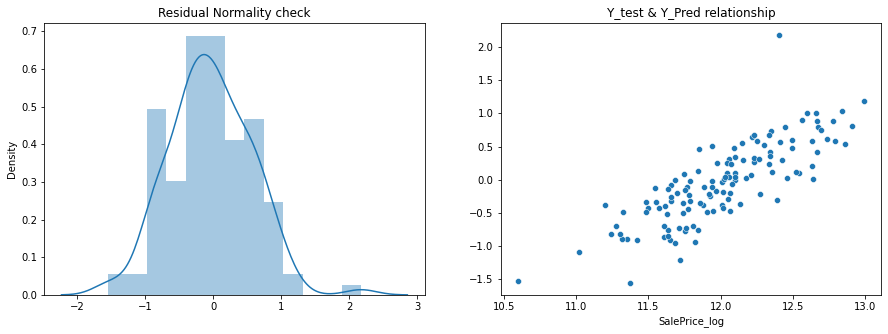

In [80]:
var_drop=['BsmtFinType1_NA','BsmtCond_NA','GarageQual_Po','GarageQual_Gd','GarageQual_TA','Exterior1st_Stone'
          ,'RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Roll','RoofMatl_Tar&Grv','MSZoning_RM','SaleType_Con'
          ,'SaleCondition_Alloca','RoofMatl_WdShake','SaleCondition_AdjLand','BsmtExposure_NA','Condition1_Feedr'
          ,'ExterQual_TA','ExterQual_Fa','Condition2_PosN','CentralAir_Y','GarageQual_Fa','GarageCond_TA'
          ,'GarageCond_Gd','GarageCond_Po','MSZoning_RH','Condition1_PosN','GrAreaPerRmsAbvGrd','Functional_Sev'
         ,'Functional_Typ','SaleCondition_Normal','Condition1_Norm','Condition1_RRAn','Condition1_PosA','Condition1_RRNn','MSZoning_RL']
# 'BsmtFinType1_NA','BsmtCond_NA','BsmtQual_NA','Utilities_NoSeWa','MSZoning_RM','Exterior1st_MetalSd'\
#          ,'Exterior2nd_MetalSd','SaleCondition_Partial','Electrical_FuseP','Functional_Sev','RoofMatl_CompShg'\
#          ,'RoofMatl_Roll','RoofMatl_WdShake','GrLivArea','Street_Pave','LotShape_IR3','RoofMatl_Tar&Grv','Neighborhood_OldTown'\
#          ,'ExterCond_Gd','ExterCond_TA','ExterQual_TA','RoofMatl_Membran','ExterQual_Fa','Condition2_PosN','SaleType_Con'\
#           ,'CentralAir_Y','BldgType_Duplex','ExterCond_Po','TotalBsmtSF'
X_train1=X_train[col].drop(columns=var_drop,axis=1)
X_test1=X_test[col].drop(columns=var_drop,axis=1)
linear_reg1(X_train1,train_labels,X_test1,test_labels)
vif(X_train1)


In [81]:
sm1(X_train1,train_labels)

                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     237.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.25e-307
Time:                        00:57:51   Log-Likelihood:                 276.55
No. Observations:                1022   AIC:                            -523.1
Df Residuals:                    1007   BIC:                            -449.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.2792 

# Ridge Regression

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

lm_ridge=Ridge()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1,2,5,7,10,20,30,40,50,100,500]]}

In [83]:
lm_ridge_grd = GridSearchCV(estimator = lm_ridge, param_grid=parameters)

In [84]:
X_train1=X_train[col]
X_test1=X_test[col]
lm_ridge_grd.fit(X_train1,train_labels)

print("The best value of Alpha is: ",lm_ridge_grd.best_params_,lm_ridge_grd.best_score_)

The best value of Alpha is:  {'alpha': 2} 0.8010322813139761


In [85]:
lm_ridge_best_gcv = lm_ridge_grd.best_estimator_
lm_ridge_best_gcv

Ridge(alpha=2)

In [86]:
lm_ridge_best_gcv.fit(X_train1,train_labels)

Ridge(alpha=2)

## Ridge Prediction

In [87]:
y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train1)
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test1)

In [88]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_ridge_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_ridge_gcv)))) 

Root Mean Square Error train = 0.15527454264883517
Root Mean Square Error test = 0.175247920884519


In [89]:
print("R-Square for training data",lm_ridge_best_gcv.score(X_train1,train_labels)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_ridge_best_gcv.score(X_test1,test_labels))

R-Square for training data 0.8354792260362001
R-Square for testing data 0.8374944901681989


# LASSO 

In [90]:
from sklearn.linear_model import Lasso

In [91]:
lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1,2,3,5,7,10,100,500]]}

In [92]:
lm_lasso_grd = GridSearchCV(estimator=lm_lasso, 
                            param_grid=parameters)

In [93]:
X_train1=X_train[col]
X_test1=X_test[col]

lm_lasso_grd.fit(X_train1,train_labels)

print("The best value of Alpha is: ",lm_lasso_grd.best_params_,lm_lasso_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.0005} 0.794622840285038


In [94]:
lm_lasso_best_gcv = lm_lasso_grd.best_estimator_
lm_lasso_best_gcv

Lasso(alpha=0.0005)

In [95]:
lm_lasso_best_gcv.fit(X_train1,train_labels)

Lasso(alpha=0.0005)

## Lasso Prediction

In [96]:
y_pred_train_lasso_gcv = lm_lasso_best_gcv.predict(X_train1)
y_pred_test_lasso_gcv =  lm_lasso_best_gcv.predict(X_test1)

In [97]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_lasso_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_lasso_gcv)))) 

Root Mean Square Error train = 0.15873203917907275
Root Mean Square Error test = 0.1784275684584758


In [98]:
print("R-Square for training data",lm_lasso_best_gcv.score(X_train1,train_labels)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_lasso_best_gcv.score(X_test1,test_labels))

R-Square for training data 0.8280708890216661
R-Square for testing data 0.8315440883819588


# ElasticNet

In [99]:
from sklearn.linear_model import ElasticNet

In [100]:
lm_elastic = ElasticNet()
parameters= {'alpha':[x for x in [0.0005,0.1,0.001,0.01,0.2,0.4,0.5,0.7,0.8,1]]}

In [101]:
lm_elastic_grd = GridSearchCV(lm_elastic, param_grid=parameters)

In [102]:
lm_elastic_grd.fit(X_train1,train_labels)

print("The best value of Alpha is: ",lm_elastic_grd.best_params_,lm_elastic_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.7977215845841437


In [103]:
lm_elastic_best_gcv = lm_elastic_grd.best_estimator_
lm_elastic_best_gcv

ElasticNet(alpha=0.001)

In [104]:
lm_elastic_best_gcv.fit(X_train1,train_labels)

ElasticNet(alpha=0.001)

## ElasticNet Prediction

In [105]:
y_pred_train_elastic_gcv = lm_elastic_best_gcv.predict(X_train1)
y_pred_test_elastic_gcv =  lm_elastic_best_gcv.predict(X_test1)

In [106]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(train_labels, y_pred_train_elastic_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(test_labels, y_pred_test_elastic_gcv)))) 

Root Mean Square Error train = 0.15980369313551399
Root Mean Square Error test = 0.1781845004160738


In [107]:
print("R-Square for training data",lm_elastic_best_gcv.score(X_train1,train_labels)) # Return the coefficient of determination R^2 of the prediction.
print("R-Square for testing data",lm_elastic_best_gcv.score(X_test1,test_labels))

R-Square for training data 0.8257415486423351
R-Square for testing data 0.8320027434981407


Looking at the obtained results, the model giving us better results is the Lasso
Regression model

__Q1.__ Which variables are significant in predicting the price of a house

__Ans.__ these are the variables which are signifinactly predicting the price of House , no variable is insignificant with __76.7%__ of accuracy 

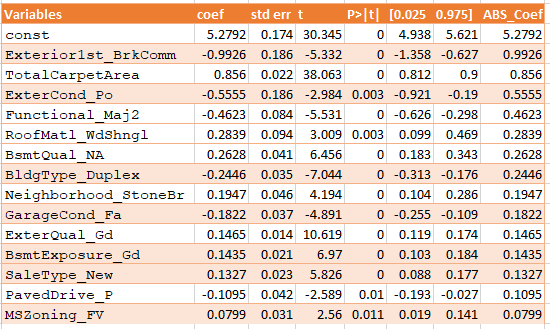

__Q2.__ How well those variables describe the price of a house.



__ANS.__ __76.7%__ of Accuracy we are getting with the above mentioned variables

__Q3.__ Also, determine the optimal value of lambda for ridge and lasso regression.


__ANS.__ The  lambda value of __Lasso(alpha=0.0005)__  and __Ridge(alpha=2)__